In [19]:
# Name : Taukir Shekh[19DCS134]
import numpy as np
import matplotlib.pyplot as plt
import random

In [20]:
def est_cof(x,y):
  n=np.size(x)
  m_x=np.mean(x)
  m_y=np.mean(y)

  SS_xy=np.sum(y*x)-n*m_y*m_x
  SS_xx=np.sum(x*x)-n*m_x*m_x

  b1=SS_xy/SS_xx
  b0=m_y-b1*m_x

  return(b0,b1)  

In [21]:
n=40
x1,y1=[],[]
for i in range(1, n+1):
  x1.append(i)
  y1.append(random.randint(1,n+1))
x,y=np.array(x1),np.array(y1)
y

array([ 9, 29, 19,  1,  5, 11, 27, 12, 38,  8, 21, 29, 21,  3, 39,  5, 15,
        1, 37, 19,  2, 19, 35, 33, 31, 36, 31, 15, 19,  1,  8,  8, 39,  2,
       10,  3, 40, 22, 34, 12])

In [22]:
b=est_cof(x,y)
print("\n Estimated Coefficient :\n b_0 : {}\n b_1 : {}\n".format(b[0],b[1]))

y_pred=b[0]+b[1]*x
print(y_pred)


 Estimated Coefficient :
 b_0 : 16.680769230769233
 b_1 : 0.09971857410881801

[16.7804878  16.88020638 16.97992495 17.07964353 17.1793621  17.27908068
 17.37879925 17.47851782 17.5782364  17.67795497 17.77767355 17.87739212
 17.97711069 18.07682927 18.17654784 18.27626642 18.37598499 18.47570356
 18.57542214 18.67514071 18.77485929 18.87457786 18.97429644 19.07401501
 19.17373358 19.27345216 19.37317073 19.47288931 19.57260788 19.67232645
 19.77204503 19.8717636  19.97148218 20.07120075 20.17091932 20.2706379
 20.37035647 20.47007505 20.56979362 20.6695122 ]


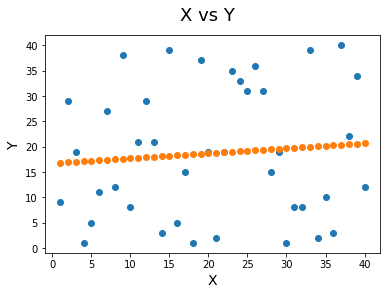

In [23]:
# Graph of X vs Y
fig=plt.figure()
plt.scatter(x,y)
plt.scatter(x,y_pred)
fig.suptitle('X vs Y', fontsize=18)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.show()

In [24]:
m,c,l_r,iter=0,0,0.0001,1000
n=float(len(x))

for i in range(len(x)):
  Y_pd=m*x + c 
  D_m1 = (-2/n) * sum(x * (y - Y_pd))
  D_c1 = (-2/n) * sum(y - Y_pd)
  m = m - l_r * D_m1
  c = c - l_r * D_c1
print (m,c)

0.7091016398038251 0.05831917320757878


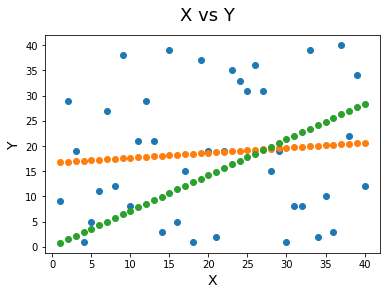

In [25]:
# Graph of X vs Y
fig=plt.figure()
plt.scatter(x,y)
plt.scatter(x,y_pred)
plt.scatter(x,Y_pd)
fig.suptitle('X vs Y', fontsize=18)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression
import pandas as pd

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Datasets/
%ls

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/Datasets
 Admission_Predict.csv
 Admission_Predict_Ver1.1.csv
'Breast Cancer Wisconsin Dataset.csv'
 cwurData.csv
 data.csv
 dataset_31_credit-g.csv
'default of credit card clients (1).xlsx'
'FIFA 19 Dataset.csv'


In [27]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [28]:
find='Chance of Admit '
y=df[find]
x=df.drop([find,'Serial No.'],axis=1,inplace=False)

In [29]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [30]:
regs=LinearRegression().fit(x,y)
regs.score(x,y)

0.8219007395178417

In [31]:
regs.coef_

array([0.00185851, 0.00277797, 0.00594137, 0.00158614, 0.01685874,
       0.11838505, 0.02430748])

In [32]:
regs.intercept_

-1.2757250829969908

In [33]:
y_pred1 = regs.predict(x)
y_pred1

array([0.95188302, 0.80403133, 0.65344812, 0.7445193 , 0.63154964,
       0.87449345, 0.70873689, 0.59658817, 0.55037924, 0.7166568 ,
       0.73230708, 0.8361088 , 0.85258378, 0.64376819, 0.64333755,
       0.64765144, 0.71535936, 0.65773635, 0.73739029, 0.65098033,
       0.61722139, 0.7016542 , 0.92700657, 0.96173916, 0.9588498 ,
       0.9630366 , 0.76315152, 0.51895532, 0.42608928, 0.48762151,
       0.60173397, 0.71664474, 0.92176606, 0.93714633, 0.95539958,
       0.85995516, 0.65453013, 0.53816237, 0.50482378, 0.58365522,
       0.6476116 , 0.65630992, 0.68337649, 0.84196389, 0.88546532,
       0.83497493, 0.89804598, 0.93750178, 0.80611696, 0.75506225,
       0.68278595, 0.61474312, 0.71933504, 0.69304722, 0.65695951,
       0.5898518 , 0.54253815, 0.50480029, 0.43058924, 0.622548  ,
       0.60248697, 0.62091394, 0.64323028, 0.70633145, 0.74818254,
       0.78373966, 0.78968732, 0.73240017, 0.8247072 , 0.8603845 ,
       0.95657045, 0.96154284, 0.89418791, 0.80071339, 0.76281

In [34]:
mae = sum(y-y_pred1)/y.count()
print(mae)

-5.623279619726418e-16


In [35]:
rmse = ((sum((y-y_pred1)**2))**0.5)/y.count()
print(rmse)

0.002661109115483281


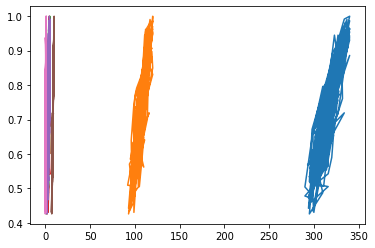

In [36]:
import matplotlib.pyplot as plt
plt.plot(x,y_pred1)